# BEE 4750 Homework 1: Introduction to Using Julia

**Name**: Akshara Chandrabalan

**ID**: ac2837

> **Due Date**
>
> Friday, 9/8/23, 9:00pm

## Overview

### Instructions

-   Problems 1-3 consist of a series of code snippets for you to
    interpret and debug. For Problems 1 and 2, you will be asked to
    identify relevant error(s) and fix the code. For Problem 3, the code
    works as intended; your goal is to identify the code’s purpose by
    following its logic.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [3]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating 

project at `~/Documents/BEE 5750 /hw01-akshara-c`


In [4]:
using Plots
using GraphRecipes
using LaTeXStrings

## Problems (Total: 40 Points)

### Problem 1 (8 points) 

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [5]:
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 0


#### Problem 1.1 (3 points)

Describe the logic error.

ANSWER: The min_value is set to 0, so when the loop executes, the if statement condition is checking if the array values are greater than 0 instead of checking if the array values are greater than the previous array element. Since none of the array values are bigger than 0 in the input case, the function just returns 0.  

#### Problem 1.2 (3 points)

Write a fixed version of the function.

In [6]:
function minimum(array)
    min_value = array[1] # min_value is set to equal the first element of the array
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

minimum (generic function with 1 method)

#### Problem 1.3 (2 points)

Use your fixed function to find the minimum value of `array_values`.

In [7]:
array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


### Problem 2 (8 points) 

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [8]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

UndefVarError: UndefVarError: `average_grade` not defined

#### Problem 2.1 (3 points)

Describe the logic and/or syntax error.

ANSWER: The undefined variable error is because the class_average function is never called, so the average_grade variable is not returned and therefore, does not exist within the necessary scope to execute. Next, mean is not a defined function and the argument for mean should be the local variable grades, not student_grades. 

#### Problem 2.2 (3 points)

Write a fixed version of the code.

In [9]:
function class_average(grades)
    sum = 0 # initializing sum variable 
    for i = 1:length(grades)
        sum += grades[i]
    end
    average_grade = sum/length(grades)
    return average_grade
end

class_average (generic function with 1 method)

#### Problem 2.3 (2 points)

Use your fixed code to compute the average grade for the class.

In [10]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show class_average(student_grades);

class_average(student_grades) = 94.4


### Problem 3 (8 points) 

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [11]:
function mystery_function(values)
    y = []
    for v in values
        if !(v in y)
            append!(y, v)
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


#### Problem 3.1 (4 points)

Explain the purpose of `mystery_function`.

ANSWER: To return an array of unique elements, in this case integers, from the input array. The function checks if the number in the input array exists in the newly created array and if it doesn't, it adds that number to the new array, and if it does, it doesn't add that number to the new array. The result is an output array that doesn't contain any repeated numbers.

#### Problem 3.2 (4 points)

Add comments to the code, explaining why and how it works. Refer to
[“Best Practices for Writing Code
Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
and remember that bad comments can be just as bad as no comments at all.
You do not need to add comments to every line (in fact, this is very bad
practice), but you should note the *purpose* of every “section” of code,
and add comments explaining any code sequences that you don’t
immediately understand.

In [12]:
# function returns an array of unique elements from the input array
function mystery_function(values)
    y = []
    for v in values # iterates for the length of the input array, where v equals the values in the array
        if !(v in y) # condition: if the value v does not exist in array y, execute if statement
            append!(y, v) # appending value v to the array y  
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


### Problem 4 (16 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

#### Problem 4.1 (3 points)

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

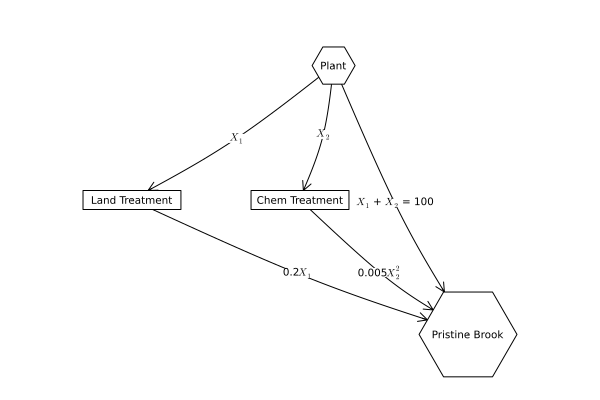

In [13]:
using GraphRecipes, Plots

A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"$X_1$", (1,3) => L"$X_2$", (1, 4) => L"$X_1$ + $X_2$ = 100", (2, 4) => L"0.2$X_1$", (3, 4) => L"0.005$X_2^2$")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)

$X_1$ and $X_2$ are in $m^3$/day. 0.005 $X_2^2$ is the simplified form of the following expression: $X_2$ - $X_2$(1-0.005 $X_2$). Assuming there is no decay and the concentration of YUK in the wastewater (1 kg/$m^3$) is constant throughout the system.

#### Problem 4.2 (4 points)

Formulate a mathematical model for the treatment cost and the amount of
YUK that will be discharged into Pristine Brook based on the wastewater
allocations. This is best done with some equations and supporting text
explaining the derivation. Make sure you include, as additional
equations in the model, any needed constraints on relevant values. You
can find some basics on writing mathematical equations using the LaTeX
typesetting syntax
[here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
and a cheatsheet with LaTeX commands can be found on the course
website’s [Resources
page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

ANSWER: The amount of YUK that will be discharged into Pristine Brook based on the wastewater allocations is modeled by the following: 
$$0.2X_1 + 0.005X_2^2 \leq 20 \; (Eq. \; 1)$$ 
$$X_1 + X_2 = 100 \; (Eq. \; 2)$$ 

Eq. 1 is the sum of the discharge from both treatment methods, which cannot exceed 20 kg/day. Normally the expression would be multiplied by the concentration of YUK in the wastewater, but since the concentartion is 1 kg/$m^3$ in this scenerio, it is not explicitly shown. Eq. 2 is the constraint, as 100 $m^3$/day of wastewater is discharged from the plant.

The treatment cost is given by the following expression:
$$\frac{X_1^2}{20} + 1.5X_2 \; (Eq. \; 3)$$

It is given in the question that the land treatment method costs $X_1^2$/20 dollars per day and the chemical treatment method costs 1.50 dollars per $m^3$ of wastewater treated. The total cost of treatment will be in dollars per day.



#### Problem 4.3 (4 points)

Implement this systems model as a Julia function which computes the
resulting YUK concentration and cost for a particular treatment plan.
You can return multiple values from a function with a
[tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1), as
in:

In [14]:
function yuk(x1, x2) # user inputs a wastewater discharge treatment combination 
    if (x1 + x2 == 100) # condition to check constraint is met
       yuk_discharge = (0.2 * x1) + (0.005 * abs2(x2))
       cost = (abs2(x1)/20) + (1.5 * x2)
    else
        throw(error("Error: Input discharge quantities do not equal 100, try again.")) # user is prompted to enter a new input if constraint is not met
    end
    return (yuk_discharge, cost)
end

# test
final_yuk, trt_cost = yuk(80, 20)

@show final_yuk;
@show trt_cost;

final_yuk = 18.0
trt_cost = 350.0


final_yuk is the resulting YUK concentartion in kg/day and trt_cost is the associated total treatment cost in $/day.

Make sure you comment your code appropriately to make it clear what is
going on and why.

#### Problem 4.4 (5 points)

Use your function to experiment with some different combinations of
wastewater discharge and treatment. Can you find one that satisfies the
YUK effluent standard? What was the cost? You don’t have to find an
“optimal” solution to this problem, but what do you think would be
needed to find a better solution?

In [15]:
final_yuk, trt_cost = yuk(60, 40)

println("Test Combination 1");
@show final_yuk;
@show trt_cost;
println()

final_yuk, trt_cost = yuk(61, 39)

println("Test Combination 2");
@show final_yuk;
@show trt_cost;

Test Combination 1
final_yuk = 20.0
trt_cost = 240.0



Test Combination 2
final_yuk = 19.805
trt_cost = 244.55


ANSWER: $X_1$ = 61 $m^3$ per day and $X_2$ = 39 $m^3$ per day satisfies the YUK effluent standard and would cost $244.55 per day.

To find a better solution, you would need to determine the effluent concentration you want to maintain, how much you are willing to pay for treatment, and an acceptable tolerance level. Then, iteratively test the function with different $X_1$ and $X_2$ combinations until the outputs are within the tolerance limits of the selected YUK concentration and cost.  

## References

List any external references consulted, including classmates.

*Markdown*. (n.d.). Julia Documentation. https://docs.julialang.org/en/v1/stdlib/Markdown/#:~:text=Italics,the%20enclosed%20text%20in%20italics

Ray, K. (2020, April 21). *Getting square of absolute value in Julia – abs2() Method*. GeeksforGeeks. https://www.geeksforgeeks.org/getting-square-of-absolute-value-in-julia-abs2-method/

*Spacing in Math mode*. (n.d.). Emerson Emory. http://www.emerson.emory.edu/services/latex/latex_119.html

Srikrishnan, V. (2023). *BEE 4750 Lab 1: Julia Basics*. BEE 4750/5750 Environmental Systems Analysis. https://viveks.me/environmental-systems-analysis/labs/lab01/lab01.html

Srikrishnan, V. (2023). *Tutorial: Using LaTeX in Jupyter Notebooks*. BEE 4750/5750 Environmental Systems Analysis. https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.html

Consulted with: Christine Swanson